Vorbereitung:

In [192]:
from lgca import get_lgca
from lgca.helpers import *
from lgca.analysis import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd
import collections
import statistics
from scipy.interpolate import interp1d


thom erstellen:

In [13]:
create = True
variation = '18045'
filename = 'af7d9b3'
path = 'saved_data/pummelzeugs_45/'
rep = 500

if create:
    create_thom(variation=variation, filename=filename, path=path, rep=rep, save=True)

Max: 28720, Min: 2085, Mean: 9252.640000


thoms einlesen:

In [193]:
variation01 = '1801'
path01 = 'saved_data/pummelzeugs_1/'
thom01 = np.load(path01 + variation01 + '_thom.npy')

variation02 = '1802'
path02 = 'saved_data/pummelzeugs_2/'
thom02 = np.load(path02 + variation02 + '_thom.npy')

variation45 = '18045'
path45 = 'saved_data/pummelzeugs_45/'
thom45 = np.load(path45 + variation45 + '_thom.npy')

variation60 = '18060'
path60 = 'saved_data/pummelzeugs_60/'
thom60 = np.load(path60 + variation60 + '_thom.npy')

variation90 = '18090'
path90 = 'saved_data/pummelzeugs_90/'
thom90 = np.load(path90 + variation90 + '_thom.npy')

Datensatz erstellen:

In [194]:
# data = {'rc=02': thom02, 'rc=01': thom01}
# data = {'rc=01': thom01, 'rc=02': thom02, 'rc=45': thom45, 'rc=60': thom60, 'rc=90': thom90}
data = {'rc=90': thom90}

Histogramme erstellen:

max in intervall [7800, 7900]
with total=  8.0


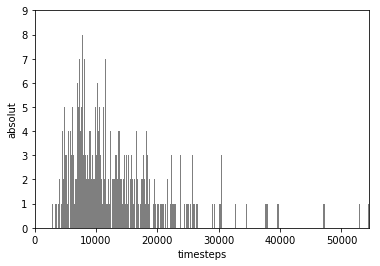

In [195]:
intervall = 100
save = True
for i, key in enumerate(data):
#     print(key, i)
    thom = data[key]
    plot_histogram_thom(thom, int_length=intervall, save=save, id=key + 'histogram with li = ' + str(intervall))

Vergleich verschiedener Variations:

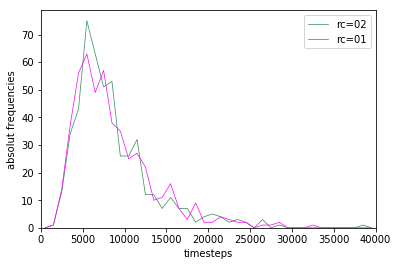

In [24]:
intervall = 1000
save = True
if save:
    filename = ''
    for i, key in enumerate(data):
        filename = filename + str(key) + '_'
    thom_all(time_array=data, int_length = intervall, save=save, id=filename + 'li=' + str(intervall))
else:
    thom_all(time_array=data, int_length = intervall)

In [9]:
for i, entry in enumerate(thom90):
    if entry >= 7800 and entry <= 7900:
        print(entry, i)

7839.0 38
7883.0 42
7823.0 71
7828.0 124
7813.0 249
7803.0 337
7899.0 396
7854.0 449


max in intervall [5000, 5500]
max in intervall [7000, 7500]
with total=  33.0


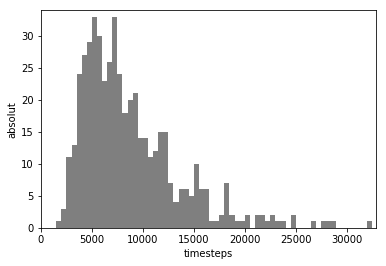

In [28]:
intervall = 500
save = True
data ={'rc=01': thom01}
for i, key in enumerate(data):
#     print(key, i)
    thom = data[key]
    plot_histogram_thom(thom, int_length=intervall, save=save, id=key + 'histogram with li = ' + str(intervall))

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41. 43. 45. 47. 49. 51. 53. 55. 57. 59. 61. 63. 65. 67.]
[ 0.  1. 14. 37. 56. 63. 49. 57. 38. 35. 25. 27. 22. 10. 11. 16.  7.  3.
  9.  2.  2.  4.  3.  2.  2.  0.  1.  1.  2.  0.  0.  0.  1.  0.]
[11.91664285] [[338098.33537227]]
(9.90966530035133, -2.7807217020700932e-22, 4.32629748936331)


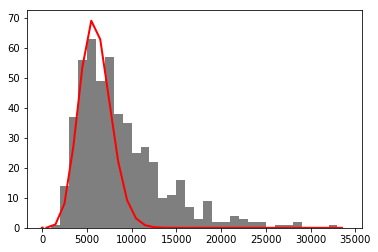

In [191]:
#----------------------------------------#
    #Poisson Verteilung...fraglich!
#----------------------------------------#

# import scipy as sp
# from scipy.optimize import curve_fit
# from scipy.special import factorial
# def poisson(k, lamb):
#     return (lamb**k/factorial(k)) * np.exp(-lamb)

# bin_middles = (x + 500)/500
# print(bin_middles)
# entries = y
# print(entries)

# parameters, cov_matrix = curve_fit(poisson, bin_middles, entries)
# print(parameters, cov_matrix)
# print (scipy.stats.lognorm.fit(entries))
# plt.bar(x+int_length/2, y, width=int_length, color='black', alpha=0.5)
# plt.plot(bin_middles, poisson(bin_middles, *parameters), 'r-', lw=2)
# x_plot = bin_middles * 500

# plt.plot(x_plot, 600*poisson(bin_middles, *parameters), 'r-', lw=2)
# plt.show()
